## SPOTIFY SKIP PREDICTION
### NAME : CHIRANTHANA R R


### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### LOADING THE DATASET

In [2]:
tracks=pd.read_csv("track_feats.csv")

### DATA INSIGHTS

In [3]:
tracks.shape

(316702, 30)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                316702 non-null  object 
 1   duration                316702 non-null  float64
 2   release_year            316702 non-null  float64
 3   us_popularity_estimate  316702 non-null  float64
 4   acousticness            316702 non-null  float64
 5   beat_strength           316702 non-null  float64
 6   bounciness              316702 non-null  float64
 7   danceability            316702 non-null  float64
 8   dyn_range_mean          316702 non-null  float64
 9   energy                  316702 non-null  float64
 10  flatness                316702 non-null  float64
 11  instrumentalness        316702 non-null  float64
 12  key                     316702 non-null  float64
 13  liveness                316702 non-null  float64
 14  loudness            

In [5]:
tracks.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'is_major', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object')

In [6]:
tracks.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [7]:
tracks.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,...,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000
mean,0.000923,0.883444,-0.022242,0.281541,0.477372,0.497480,0.589497,-0.001272,0.632731,0.993752,...,0.556604,0.488560,0.005364,-0.006707,-0.004315,0.003672,0.002717,-0.003631,0.005902,0.000838
std,1.005991,0.165386,1.014102,0.301165,0.162313,0.188032,0.173186,1.001798,0.228166,0.048357,...,0.063584,0.256182,1.000247,1.002609,1.003723,1.001550,1.001636,1.003240,1.002118,1.002930
min,-2.359677,0.000000,-6.207444,0.000000,0.000000,0.000000,0.000000,-3.247292,0.000000,0.000000,...,0.000000,0.000000,-2.086612,-4.441997,-3.843906,-2.349572,-2.654358,-6.287599,-1.701727,-2.881315
25%,-0.524978,0.852941,-0.169543,0.024083,0.355427,0.349182,0.475606,-0.773883,0.484491,0.971236,...,0.571429,0.281569,-0.834468,-0.497206,-0.627210,-0.762369,-0.799895,-0.538955,-0.728965,-0.619601
50%,-0.105378,0.955882,0.358592,0.156679,0.476761,0.502692,0.603000,-0.095655,0.660723,1.001626,...,0.571429,0.480178,0.083995,0.224900,0.275068,0.070669,-0.238287,0.149411,-0.281970,0.141966
75%,0.375977,0.985294,0.584683,0.485536,0.594337,0.643910,0.720020,0.644239,0.815253,1.025645,...,0.571429,0.691242,0.831649,0.656089,0.715054,0.544088,0.837206,0.727947,0.521096,0.568692
max,19.108514,1.000000,0.715584,0.995796,0.987369,0.975535,0.995690,8.727326,0.999984,1.131413,...,0.714286,0.999990,2.857353,2.315441,2.176667,3.340167,2.442389,2.147237,3.135206,3.441050


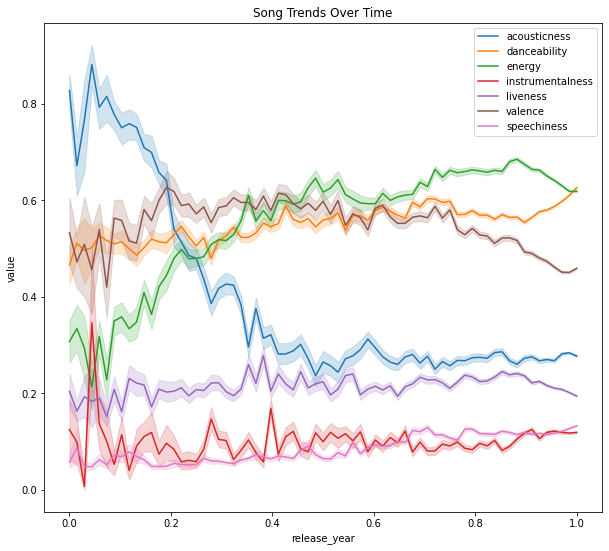

In [8]:
plt.figure(figsize=(10,9))
plt.title("Song Trends Over Time")

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='release_year', y=line, data=tracks)
    
    
plt.ylabel("value")
plt.legend(lines)

<AxesSubplot:>

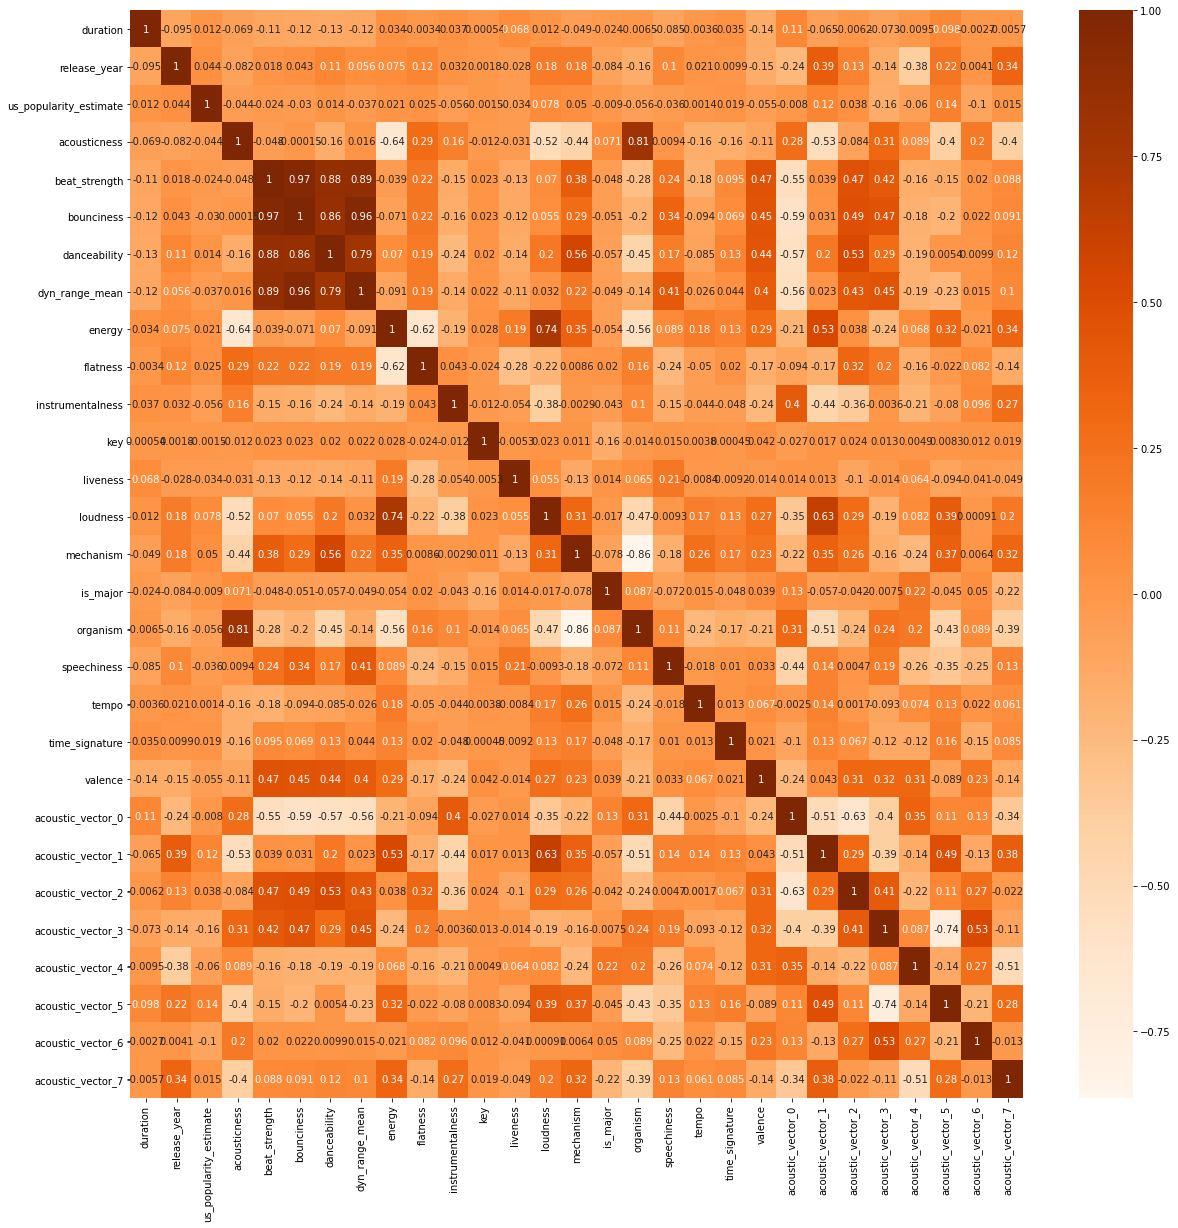

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(tracks.corr(), fmt= '.2g',annot=True, cmap="Oranges")

In [10]:
train=pd.read_csv("train_data_20.csv")

### DATA INSIGHTS

In [11]:
train.shape

(1181560, 40)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181560 entries, 0 to 1181559
Data columns (total 40 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   session_id                                  1181560 non-null  object 
 1   session_position                            1181560 non-null  float64
 2   session_length                              1181560 non-null  float64
 3   track_id_clean                              1181560 non-null  object 
 4   skip_1                                      1181560 non-null  int64  
 5   skip_2                                      1181560 non-null  int64  
 6   skip_3                                      1181560 non-null  int64  
 7   not_skipped                                 1181560 non-null  int64  
 8   context_switch                              1181560 non-null  int64  
 9   no_pause_before_play                        1181560 non-n

In [13]:
train.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_s

In [14]:
train.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,1.181560e+06,1181560.0,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,...,1.181560e+06,1.181560e+06,1181560.0,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06
mean,5.000000e-01,1.0,4.593233e-01,5.505315e-01,6.709130e-01,3.127594e-01,4.010376e-02,7.924143e-01,1.365669e-01,1.575849e-01,...,3.130023e-01,6.863807e-04,0.0,7.470463e-02,2.200481e-05,8.530248e-02,5.139951e-01,1.182335e-03,1.479400e-03,3.233141e-01
std,3.034886e-01,0.0,4.983429e-01,4.974402e-01,4.698818e-01,4.636175e-01,1.962027e-01,4.055786e-01,3.433897e-01,3.643515e-01,...,4.637155e-01,2.618989e-02,0.0,2.629143e-01,4.690879e-03,2.793314e-01,4.998043e-01,3.436478e-02,3.843453e-02,4.677417e-01
min,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e-01,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.500000e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
train.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


###  VISUALIZATION

1.0    1.0
Name: session_length, dtype: float64


<AxesSubplot:>

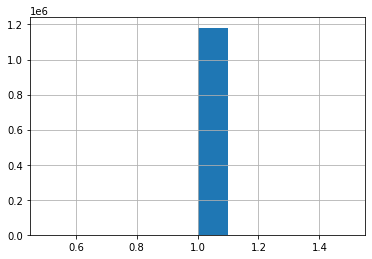

In [16]:
print(train.session_length.value_counts(normalize=True, sort=False))
train.session_length.hist()

0    0.449468
1    0.550532
Name: skip_2, dtype: float64


<AxesSubplot:>

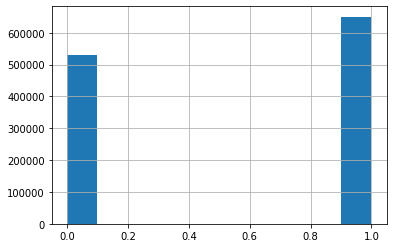

In [17]:
print(train.skip_2.value_counts(normalize=True, sort=False))
train.skip_2.astype(np.int).hist()

<AxesSubplot:>

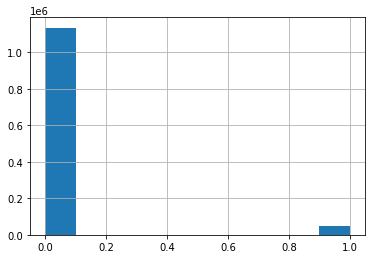

In [18]:
train.context_switch.hist()

1    1004920
0     176640
Name: premium, dtype: int64


<AxesSubplot:>

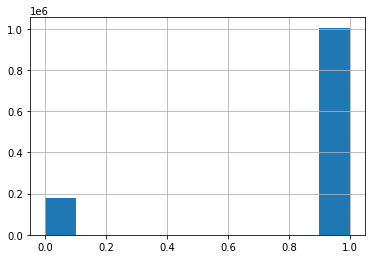

In [19]:
print(train.premium.value_counts())
train.premium.astype(np.int).hist()

<AxesSubplot:>

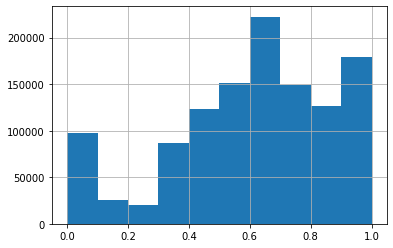

In [20]:
train.hour_of_day.hist()

Total durations are 143339
0.0009230352562140795


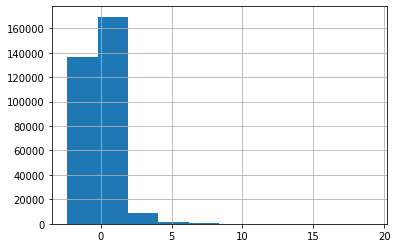

In [21]:
tracks.duration.hist();
print("Total durations are", len(set(tracks.duration)))
print(np.mean(tracks.duration.values))

<AxesSubplot:xlabel='release_year', ylabel='count'>

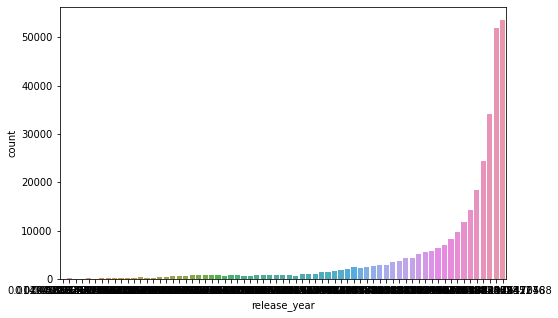

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=tracks['release_year'])

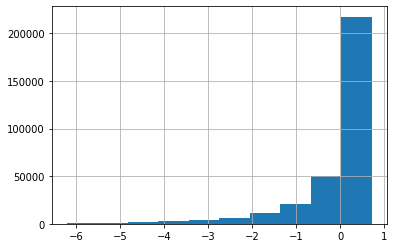

In [23]:
tracks.us_popularity_estimate.hist();

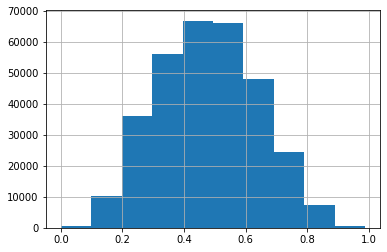

In [24]:
tracks.beat_strength.hist();


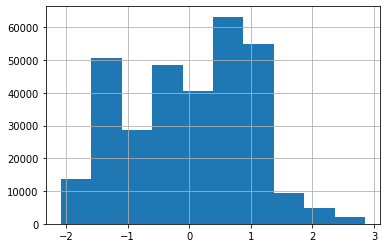

In [25]:
tracks.acoustic_vector_0.hist();

<AxesSubplot:>

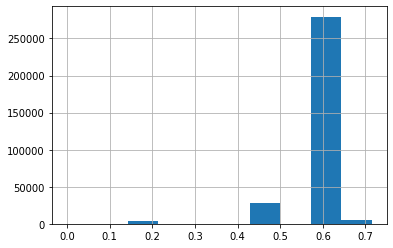

In [26]:
tracks.time_signature.hist()

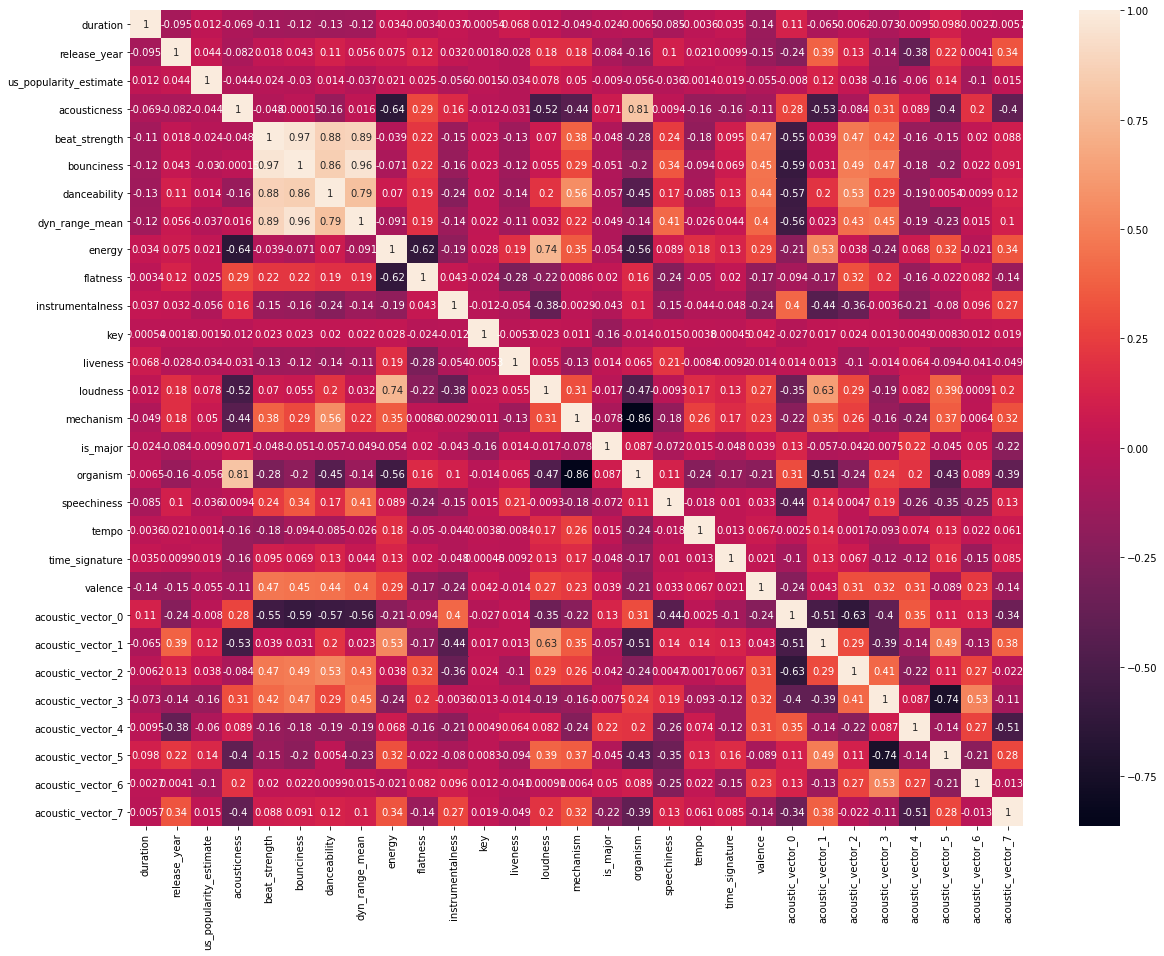

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(tracks.corr(),annot=True);

## model

In [28]:
skipped=[]
for i in train["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [29]:
train["skipped"]= pd.DataFrame(data= skipped)

In [30]:
train=train.drop("not_skipped", axis=1)

In [31]:
train.head(3)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,skipped
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [32]:
train.shape

(1181560, 40)

In [33]:
X=train.drop(["session_id", "track_id_clean","skipped"], axis=1)

y=train["skipped"]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [36]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
ypred=classifier.predict(x_test)

In [38]:
classifier.score(x_test, y_test)

0.993432411388334

In [39]:
classifier.score(x_test, y_test)

0.993432411388334

In [40]:
val=pd.read_csv("val_data_20.csv")

## insights

In [41]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74980 entries, 0 to 74979
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   session_id                                  74980 non-null  object 
 1   session_position                            74980 non-null  float64
 2   session_length                              74980 non-null  float64
 3   track_id_clean                              74980 non-null  object 
 4   skip_1                                      74980 non-null  int64  
 5   skip_2                                      74980 non-null  int64  
 6   skip_3                                      74980 non-null  int64  
 7   not_skipped                                 74980 non-null  int64  
 8   context_switch                              74980 non-null  int64  
 9   no_pause_before_play                        74980 non-null  int64  
 10  short_paus

In [42]:
val.shape

(74980, 40)

In [43]:
val.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_s

In [44]:
val.head(10)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.000000,1.0,t_0ecb0e5a-7ef9-41d0-b4a5-04227f26df91,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.052632,1.0,t_cfb7d0c1-6d2e-40d7-b88b-4257418e0e66,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.105263,1.0,t_7f13ebe6-7616-470a-a196-d7054eb16941,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.157895,1.0,t_4e830a5d-4bd2-4d99-a780-2ad244e5e185,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.210526,1.0,t_3976726e-f7bd-4bb1-b554-78f205cc297b,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.263158,1.0,t_3fa1c331-f223-4da1-9a7f-cc9973edcd53,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.315789,1.0,t_f20604fe-366b-413c-aea0-b7b2b0efcb26,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.368421,1.0,t_f212aa93-dc9a-485a-af9a-9a4ca8e833d5,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.421053,1.0,t_447c13a9-6237-4c5f-878f-5ed5a693049d,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.473684,1.0,t_3ac7d294-c316-411f-a717-7b6ff3fc8a29,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [45]:
skipped=[]
for i in val["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [46]:
val["skipped"]= pd.DataFrame(data= skipped)

In [47]:
val=val.drop("not_skipped", axis=1)

In [48]:
xv=val.drop(["session_id", "track_id_clean","skipped"], axis=1)
yv=val["skipped"]

In [49]:
from sklearn.model_selection import train_test_split
x_train_val, x_test_val, y_train_val, y_test_val = train_test_split(xv, yv, test_size=0.2, random_state=0)

In [50]:
classifier.fit(x_train_val, y_train_val)

DecisionTreeClassifier(random_state=0)

In [51]:
ypred2=classifier.predict(x_test_val)

In [52]:
classifier.score(x_test_val, y_test_val)

0.9914643905041345

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_val, ypred2)

0.008535609495865563

In [54]:
test=pd.read_csv("test_data_20.csv")

### data insights

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73960 entries, 0 to 73959
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   session_id                                  73960 non-null  object 
 1   session_position                            73960 non-null  float64
 2   session_length                              73960 non-null  float64
 3   track_id_clean                              73960 non-null  object 
 4   skip_1                                      73960 non-null  int64  
 5   skip_2                                      73960 non-null  int64  
 6   skip_3                                      73960 non-null  int64  
 7   not_skipped                                 73960 non-null  int64  
 8   context_switch                              73960 non-null  int64  
 9   no_pause_before_play                        73960 non-null  int64  
 10  short_paus

In [56]:
test.shape

(73960, 40)

In [57]:
test.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_s

In [58]:
skipped=[]
for i in test["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [59]:
test["skipped"]= pd.DataFrame(data= skipped)

In [60]:
test=test.drop("not_skipped", axis=1)

In [61]:
x=test.drop(["session_id", "track_id_clean","skipped"], axis=1)
Y=test["skipped"]

In [62]:
ypred1=classifier.predict(x)

In [63]:
classifier.score(x, Y)

0.991901027582477

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, ypred1)

array([[22781,   246],
       [  353, 50580]], dtype=int64)

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, ypred1)

0.008098972417522986

### renaming 

In [66]:
train=train.rename(columns={"track_id_clean": "track_id"})

In [67]:
train.shape

(1181560, 40)

In [68]:
train.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium',
       'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror',
   

In [69]:
train.head(3)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,skipped
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [70]:
train_data= train.copy()

In [71]:
track_feats= tracks.copy()

In [72]:
merged= pd.merge(track_feats, train_data, on=["track_id"])
merged.shape

(1181560, 69)

In [73]:
merged.to_csv("newdata.csv")

In [74]:
X=merged.drop(["session_id","track_id","skipped"], axis=1)
y=merged["skipped"]

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [77]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
ypred_merged= classifier.predict(x_test)

In [79]:
classifier.score(x_test, y_test)

0.9931023392802736

In [80]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred_merged)

0.006897660719726463

In [81]:
xm= merged.drop(["session_id","track_id", "skipped"], axis= 1)
ym= merged["skipped"]

In [82]:
from sklearn.decomposition import PCA
pca_merged= PCA(n_components=3)
principalcomponents_merged= pca_merged.fit_transform(xm)

In [83]:
prinicpal_merged= pd.DataFrame(data=principalcomponents_merged, columns= ["PC_1", "PC_2", "PC_3"] )

In [87]:
prinicpal_merged.head(10)

,PC_1,PC_2,PC_3
0,2.599160,0.170273,-1.284624
1,2.758007,-0.220868,2.535308
2,2.757083,-0.278586,-0.355012
3,2.735528,-0.299137,-0.426382
4,2.843701,-0.107593,-0.026025
5,2.884157,-0.129876,2.778669
6,2.906118,0.038354,0.910805
7,2.905310,0.029307,0.861270
8,2.891836,1.919028,-1.360466
9,2.970284,2.168785,0.307948


In [88]:
from sklearn.model_selection import train_test_split
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(prinicpal_merged, ym, test_size=0.2, random_state=0)

In [89]:
classifier.fit(x_train_m, y_train_m)

DecisionTreeClassifier(random_state=0)

In [90]:
ypred3=classifier.predict(x_test_m)

In [91]:
classifier.score(x_test_m, y_test_m)

0.9154846135617319